# Decision Tree


In [251]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text
import pandas as pd
from pydataset import data

## 1. CART with Classification target
### (a) using Gini

In [252]:
# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [253]:
pd.concat([pd.DataFrame(iris['data'], columns=iris['feature_names']).head(), pd.DataFrame(iris['target'], columns=['target']).head()], axis = 1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [254]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [255]:
X = iris.data[:, :2]
y = iris.target

In [256]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [259]:
y_pred = clf.predict(x_test)

In [260]:
print("accuracy score = ", np.round(accuracy_score(y_test, y_pred),2))

accuracy score =  0.8


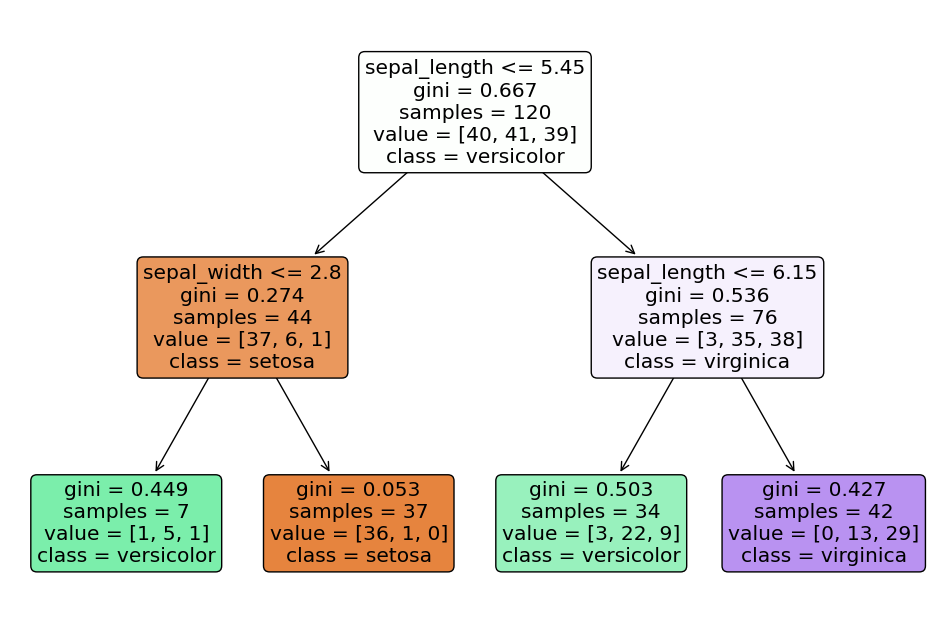

In [261]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True, feature_names=['sepal_length','sepal_width'], class_names=iris.target_names)
plt.show()

In [335]:
clf.feature_importances_

array([0.8253173, 0.1746827])

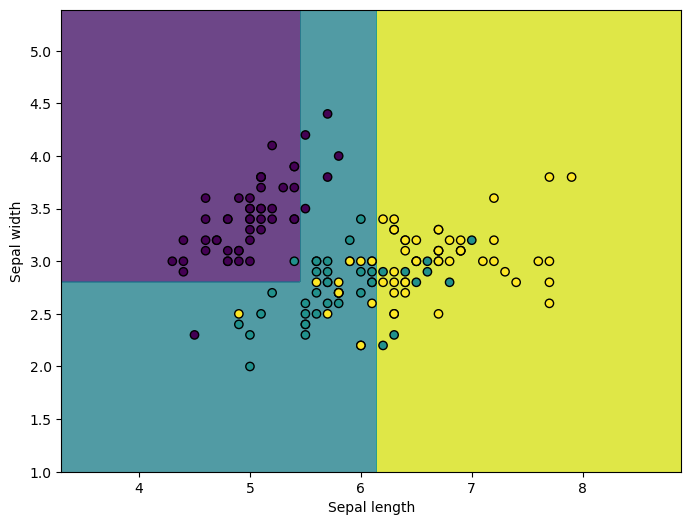

In [262]:
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel()            , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [263]:
r = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



### Decision tree is very prone to over fit. 
In above model, we created DecisionTree model only for depth=2. If we didn't specify that or any hyperparameter, Decision tree algorithm will not stop until it able to classify each and every label in the training data i.e., it will split between each and every two points. That is the reason of some bhayankar overfitting.. <br>
See below model..

In [264]:
clf_clean = DecisionTreeClassifier(random_state=42) # no max_depth
clf_clean.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [265]:
y_pred = clf_clean.predict(x_test)

In [266]:
print("accuracy score = ", np.round(accuracy_score(y_test, y_pred),2))

accuracy score =  0.63


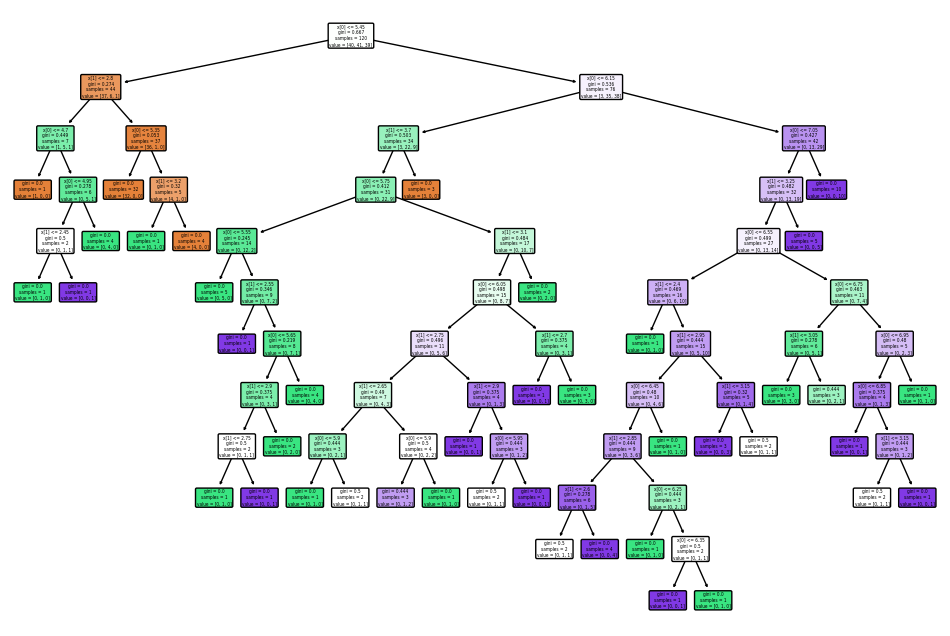

In [267]:
plt.figure(figsize=(12, 8))
plot_tree(clf_clean, filled=True, rounded=True)
plt.show()

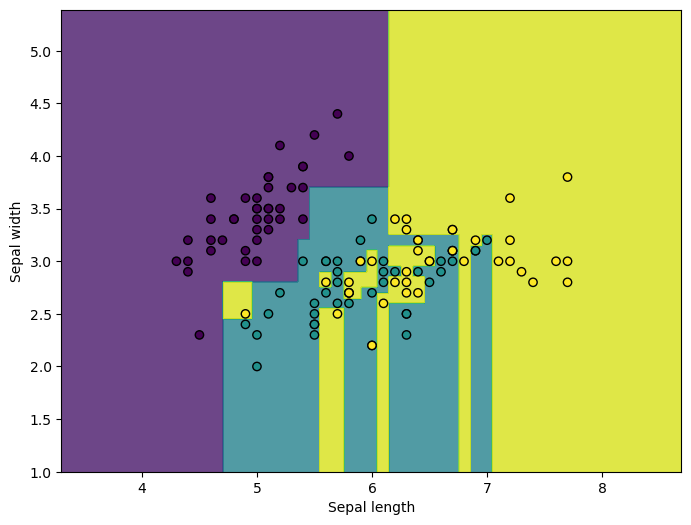

In [268]:
plt.figure(figsize=(8, 6))
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf_clean.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Here, we can see, model is trying to partition each and every label_point of the training_data, which became a tendency of overfitting. <br>
Decision Tree trying too hard to happy the training data.

In [269]:
clf_clean.feature_importances_

array([0.64313795, 0.35686205])

Decision tree give us feature importance too, input feature 1 has 0.64 weightage while input feature 2 has 0.36 weightage in predicting the target. This can help in feature selection for the model during dimensionality reduction.

### (b) using Entropy 

In [270]:
# using entropy
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
clf2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [271]:
y_pred2 = clf2.predict(x_test)

In [272]:
print("accuracy score = ", np.round(accuracy_score(y_test, y_pred2),2))

accuracy score =  0.63


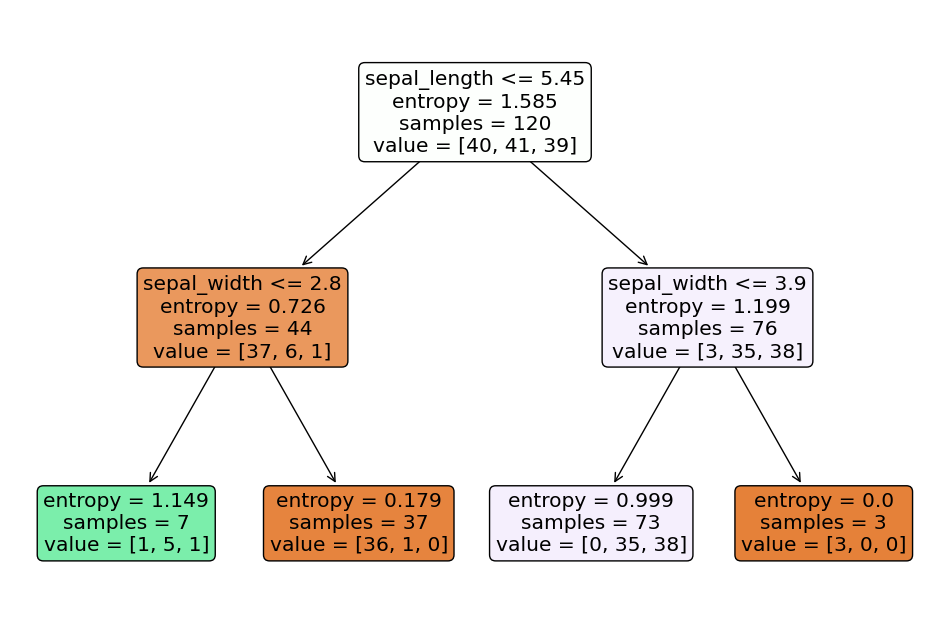

In [273]:
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, rounded=True, feature_names=['sepal_length','sepal_width'])
plt.show()

Here, the prediction is, whichever class is in majority.
<br>In leaf node 1, class 2 or say virginica is in majority with 5 values. If any value of input falls on leaf node 1 region, then prediction will be virginica.

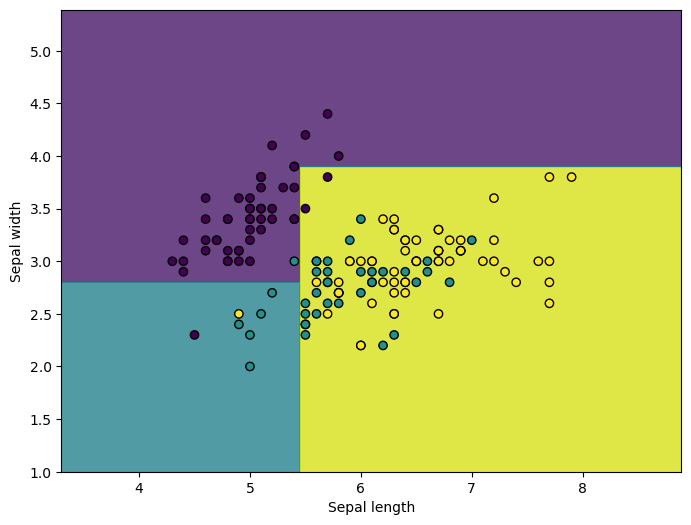

In [274]:
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [275]:
r = export_text(clf2, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_width <= 3.90
|   |   |--- class: 2
|   |--- sepal_width >  3.90
|   |   |--- class: 0



## 1. CART with Regression target
#### (a) using MSE

In [276]:
scores_df = pd.DataFrame({'Subject':['Maths', 'Physics', 'Physics', 'Maths', 'Physics', 'Physics', 'Physics', 'Physics'], 'Grade_level':['Fresher', 'Fresher', 'Fresher', 'Junior', 'Senior', 'Junior', 'Junior', 'Fresher'], 'Hours_studied':[4, 1, 4, 6, 1, 3, 4, 9], 'Test_score':[59, 82, 81, 60, 73, 85, 61, 78]})

In [277]:
scores_df

,Subject,Grade_level,Hours_studied,Test_score
0,Maths,Fresher,4,59
1,Physics,Fresher,1,82
2,Physics,Fresher,4,81
3,Maths,Junior,6,60
4,Physics,Senior,1,73
5,Physics,Junior,3,85
6,Physics,Junior,4,61
7,Physics,Fresher,9,78


In [278]:
x = scores_df.iloc[:, :3]
y = scores_df.iloc[:, 3]

In [279]:
x

,Subject,Grade_level,Hours_studied
0,Maths,Fresher,4
1,Physics,Fresher,1
2,Physics,Fresher,4
3,Maths,Junior,6
4,Physics,Senior,1
5,Physics,Junior,3
6,Physics,Junior,4
7,Physics,Fresher,9


In [280]:
oe = OrdinalEncoder(categories=[["Maths", "Physics"], ["Fresher", "Junior", "Senior"]], handle_unknown='use_encoded_value', unknown_value = np.nan)
x.iloc[:,:2] = oe.fit_transform(x.iloc[:, :2])

In [281]:
x

,Subject,Grade_level,Hours_studied
0,0.0,0.0,4
1,1.0,0.0,1
2,1.0,0.0,4
3,0.0,1.0,6
4,1.0,2.0,1
5,1.0,1.0,3
6,1.0,1.0,4
7,1.0,0.0,9


In [282]:
pd.DataFrame(oe.categories_).T, oe.transform(pd.DataFrame(oe.categories_).T)

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


(         0        1
 0    Maths  Fresher
 1  Physics   Junior
 2     None   Senior,
 array([[ 0.,  0.],
        [ 1.,  1.],
        [nan,  2.]]))

In [283]:
clf3 = DecisionTreeRegressor()
clf3.fit(x, y)

DecisionTreeRegressor()

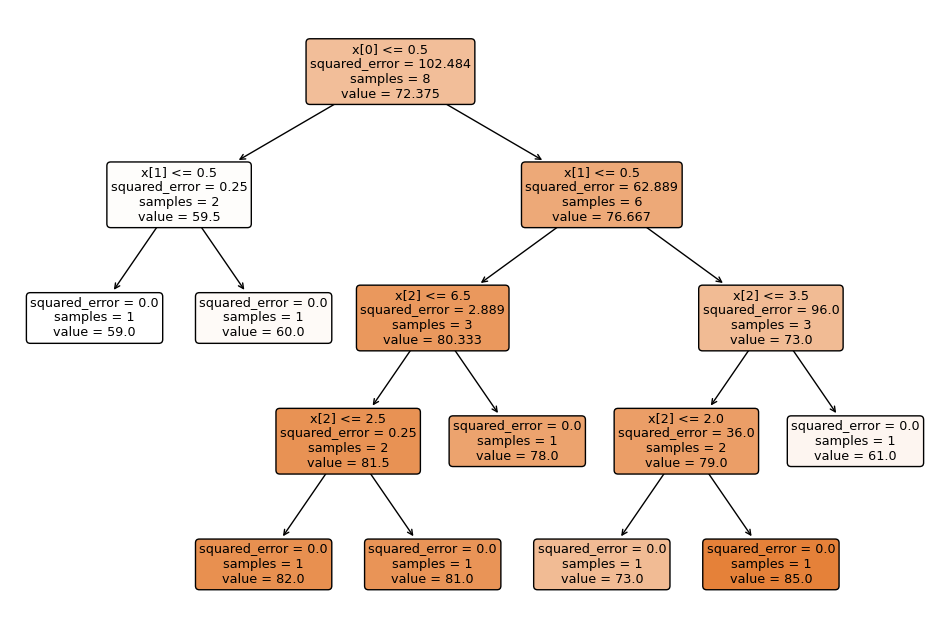

In [284]:
plt.figure(figsize=(12, 8))
plot_tree(clf3, filled=True, rounded=True)
plt.show()

In [285]:
r = export_text(clf3, feature_names=['Subject', 'Grade_level', 'Hours_studied'])
print(r)

|--- Subject <= 0.50
|   |--- Grade_level <= 0.50
|   |   |--- value: [59.00]
|   |--- Grade_level >  0.50
|   |   |--- value: [60.00]
|--- Subject >  0.50
|   |--- Grade_level <= 0.50
|   |   |--- Hours_studied <= 6.50
|   |   |   |--- Hours_studied <= 2.50
|   |   |   |   |--- value: [82.00]
|   |   |   |--- Hours_studied >  2.50
|   |   |   |   |--- value: [81.00]
|   |   |--- Hours_studied >  6.50
|   |   |   |--- value: [78.00]
|   |--- Grade_level >  0.50
|   |   |--- Hours_studied <= 3.50
|   |   |   |--- Hours_studied <= 2.00
|   |   |   |   |--- value: [73.00]
|   |   |   |--- Hours_studied >  2.00
|   |   |   |   |--- value: [85.00]
|   |   |--- Hours_studied >  3.50
|   |   |   |--- value: [61.00]



In [286]:
# feature importance
clf3.feature_importances_

array([0.53915739, 0.09899883, 0.36184378])

/tmp/ipykernel_571472/2768242192.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


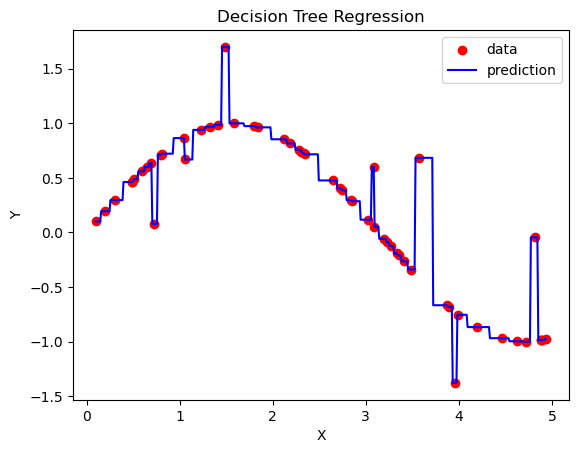

In [287]:
# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Here, we can see, model is trying to partition each and every label_point of the training_data, which became a tendency of overfitting. <br>
Decision Tree trying too hard to happy the training data.

huge overfitting as we didn't specified any hyper parameter (stopping criterion).

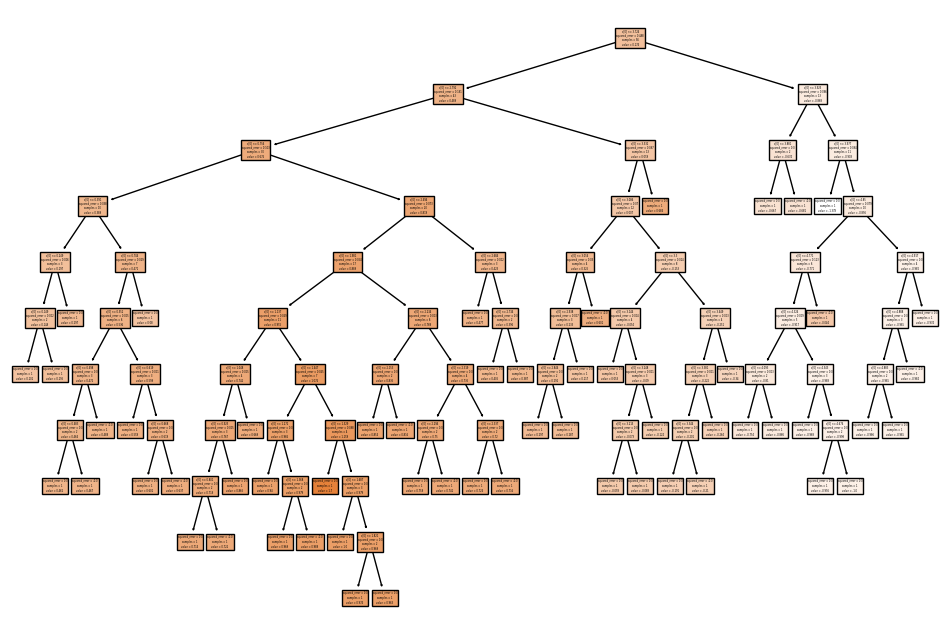

In [288]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()

creating thie same but now with max_depth hyper parameter

/tmp/ipykernel_571472/2822051277.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


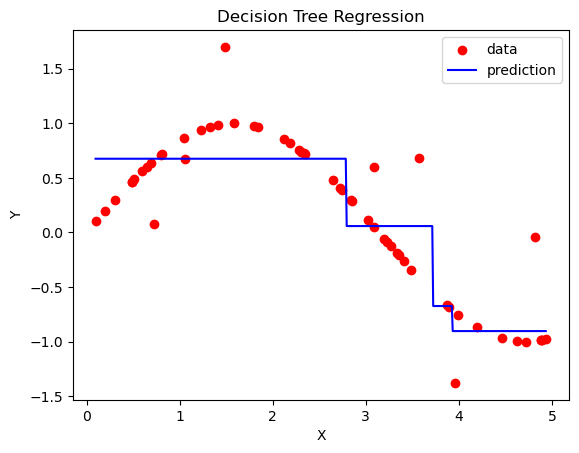

In [289]:
# creating the same with hyperparameter tuning
# Generate a non-linear dataset based on the sine function
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Decision Tree regressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

# To plot the regression curve, we'll sort the X values and predict Y values for the sorted X
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid = regressor.predict(X_grid)

# Plot the training data and the regression curve
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


all splits or cuts are perpendicular to the feature axis (x - axis).<br>
* As the tree has 3 splits for max_depth = 2, we can see three vertical lines as splits here. 
* Horizontal lines (that are parallel to x-axis) shows the average of that particular region created by that split. 

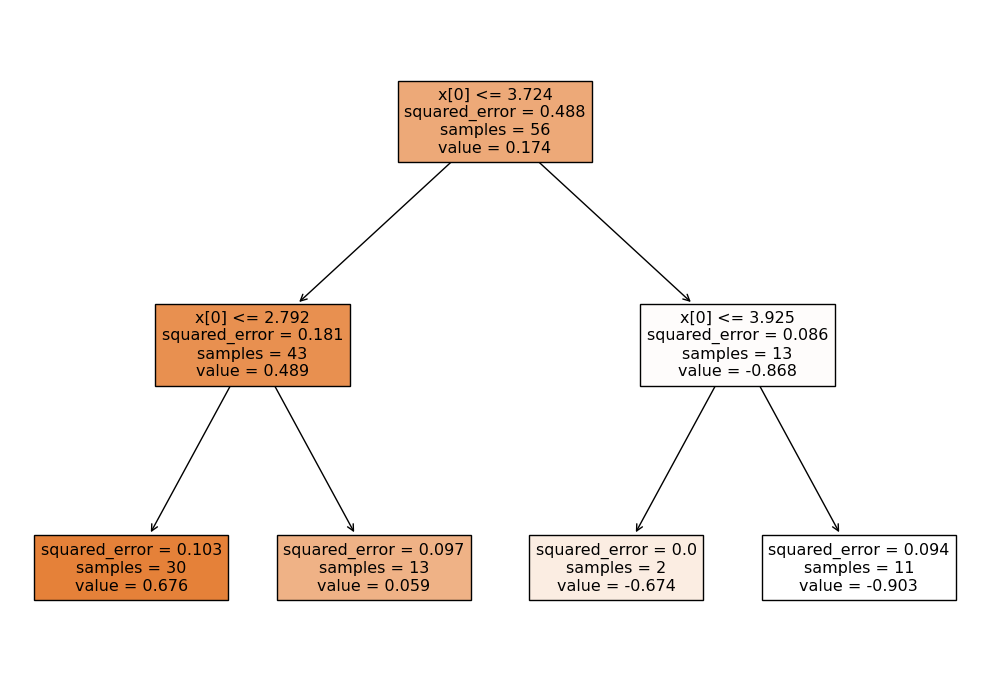

In [290]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(10, 7))
plot_tree(regressor, filled=True)
plt.tight_layout()
plt.show()

Here, Value means, the mean of all the values of that region.
e.g., in leaf node 1, we have 30 samples left there, so the value there is the average of those 30 data points.